In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


file_path = '/content/drive/MyDrive/00_KITA_2404/M3_분석라이브러리/pandas/dataset/train.csv'
df = pd.read_csv(file_path)
df.set_index('Name',inplace=True)

In [59]:
df2=df.copy()
df2.reset_index(inplace=True)
print(df.head())

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Alle

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None


In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
df.drop(columns=['PassengerId', 'Ticket','Cabin'], inplace=True)

In [63]:
print(df.head())
df.info()

                                                    Survived  Pclass     Sex  \
Name                                                                           
Braund, Mr. Owen Harris                                    0       3    male   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1  female   
Heikkinen, Miss. Laina                                     1       3  female   
Futrelle, Mrs. Jacques Heath (Lily May Peel)               1       1  female   
Allen, Mr. William Henry                                   0       3    male   

                                                     Age  SibSp  Parch  \
Name                                                                     
Braund, Mr. Owen Harris                             22.0      1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  38.0      1      0   
Heikkinen, Miss. Laina                              26.0      0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)        35.0      1      

In [64]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [65]:
unique_embarked_values = df['Embarked'].unique()
print(unique_embarked_values)
unique_sex_values = df['Sex'].unique()
print(unique_sex_values)

['S' 'C' 'Q' nan]
['male' 'female']


### Embarked
- C: Cherbourg 항구에서 탑승한 승객
- Q: Queenstown 항구에서 탑승한 승객
- S: Southampton 항구에서 탑승한 승객

In [66]:
embarked_survival_rates = df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
print("생존율이 높은 순서:")
print(embarked_survival_rates)

생존율이 높은 순서:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [68]:
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [69]:
df['Sex']=df['Sex'].replace(['female', 'male'], [1,0])
df['Embarked']=df['Embarked'].replace(['C','Q','S'], [1,0.5,0])
print(df.info())
df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.6+ KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Name,,,,,,,,
"Braund, Mr. Owen Harris",0,3,0,22.000000,1,0,7.2500,0.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,1,38.000000,1,0,71.2833,1.0
"Heikkinen, Miss. Laina",1,3,1,26.000000,0,0,7.9250,0.0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,35.000000,1,0,53.1000,0.0
"Allen, Mr. William Henry",0,3,0,35.000000,0,0,8.0500,0.0
"Moran, Mr. James",0,3,0,29.699118,0,0,8.4583,0.5
"McCarthy, Mr. Timothy J",0,1,0,54.000000,0,0,51.8625,0.0
"Palsson, Master. Gosta Leonard",0,3,0,2.000000,3,1,21.0750,0.0
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,1,27.000000,0,2,11.1333,0.0


In [70]:
df.reset_index(inplace=True)
for df1 in df:
    df['Title'] = df['Name'].str.extract('([\w]+)\.', expand=False)

In [71]:
unique_title_values = df['Title'].unique()
print(unique_title_values)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


생존율이 높은 순서:
Title
Sir         1.000000
Countess    1.000000
Ms          1.000000
Mme         1.000000
Lady        1.000000
Mlle        1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Col         0.500000
Major       0.500000
Dr          0.428571
Mr          0.156673
Jonkheer    0.000000
Don         0.000000
Rev         0.000000
Capt        0.000000
Name: Survived, dtype: float64


<Axes: xlabel='Title'>

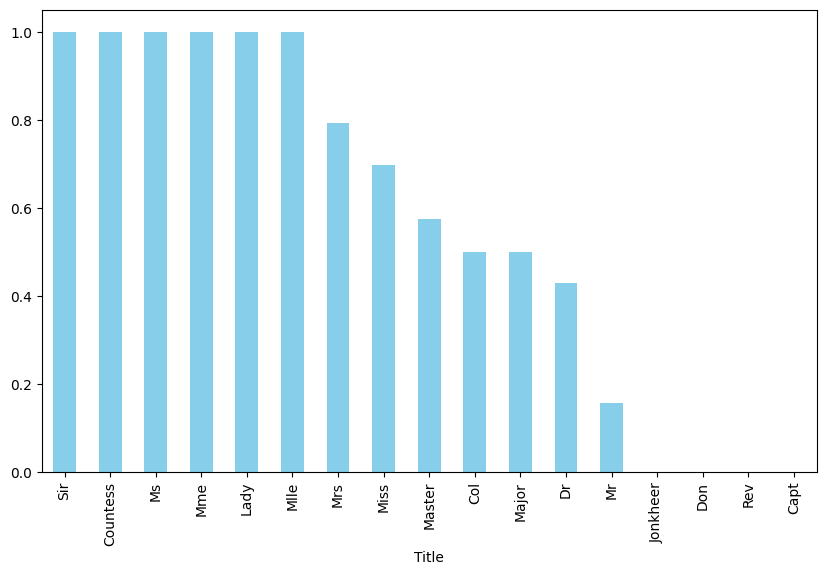

In [72]:
import matplotlib.pyplot as plt
# 가족 크기별 생존율 계산
title_survival_rate = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
print("생존율이 높은 순서:")
print(title_survival_rate)

# 그래프 그리기
plt.figure(figsize=(10, 6))
title_survival_rate.plot(kind='bar', color='skyblue')


In [73]:
def Title_G(x):
  if x=="Sir" or x=="Countess" or x=="Ms" or x=="Mme" or x=="Lady" or x=="Mlle":
    return 7
  elif x=="Mrs": return 6
  elif x=="Miss": return 5
  elif x=="Master": return 4
  elif x=="Col" or x=="Major": return 3
  elif x=="Dr":  return 2
  elif x=="Mr":  return 1
  else: return 0
df['Title'] = df['Title'].transform(Title_G)

In [74]:
df.drop('Name',axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0.0,1
1,1,1,1,38.0,1,0,71.2833,1.0,6
2,1,3,1,26.0,0,0,7.9250,0.0,5
3,1,1,1,35.0,1,0,53.1000,0.0,6
4,0,3,0,35.0,0,0,8.0500,0.0,1


In [75]:
## sibsp와 parch 합쳐서 가족 규모 변수 생성
df['Family_size']=df['SibSp'] + df['Parch'] + 1       # +1: 자기 자신 포함
df.drop(columns=['SibSp', 'Parch'], inplace=True)

<Axes: xlabel='Family_size'>

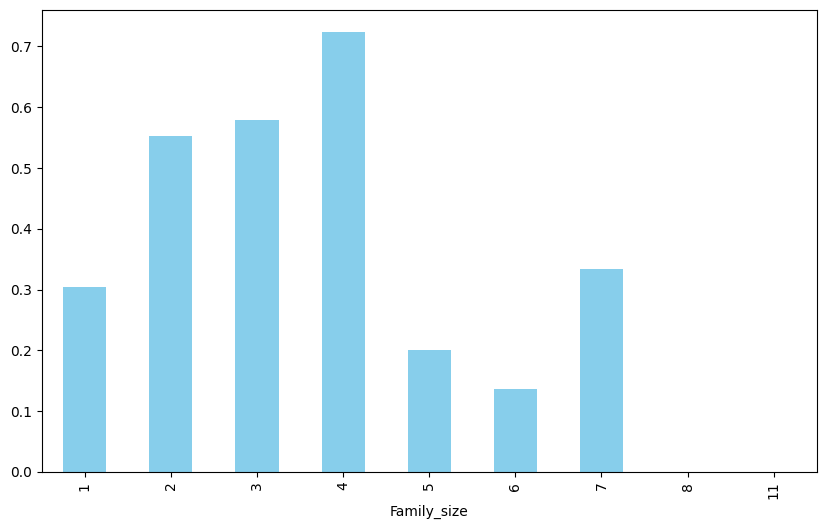

In [76]:
# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('Family_size')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')

In [77]:
# ## Family_Size를 3개의 범주로
# bins=[0,2,5,10]
# labels=['Small', 'Medium', 'Large']
# df['Familysize_group']=pd.cut(df['Family_size'], bins=bins, labels=labels)
# df.drop(columns=['Family_size'], inplace=True)

In [78]:
df['IsAlone'] = 1
df.loc[df['Family_size'] > 1, 'IsAlone'] = 0

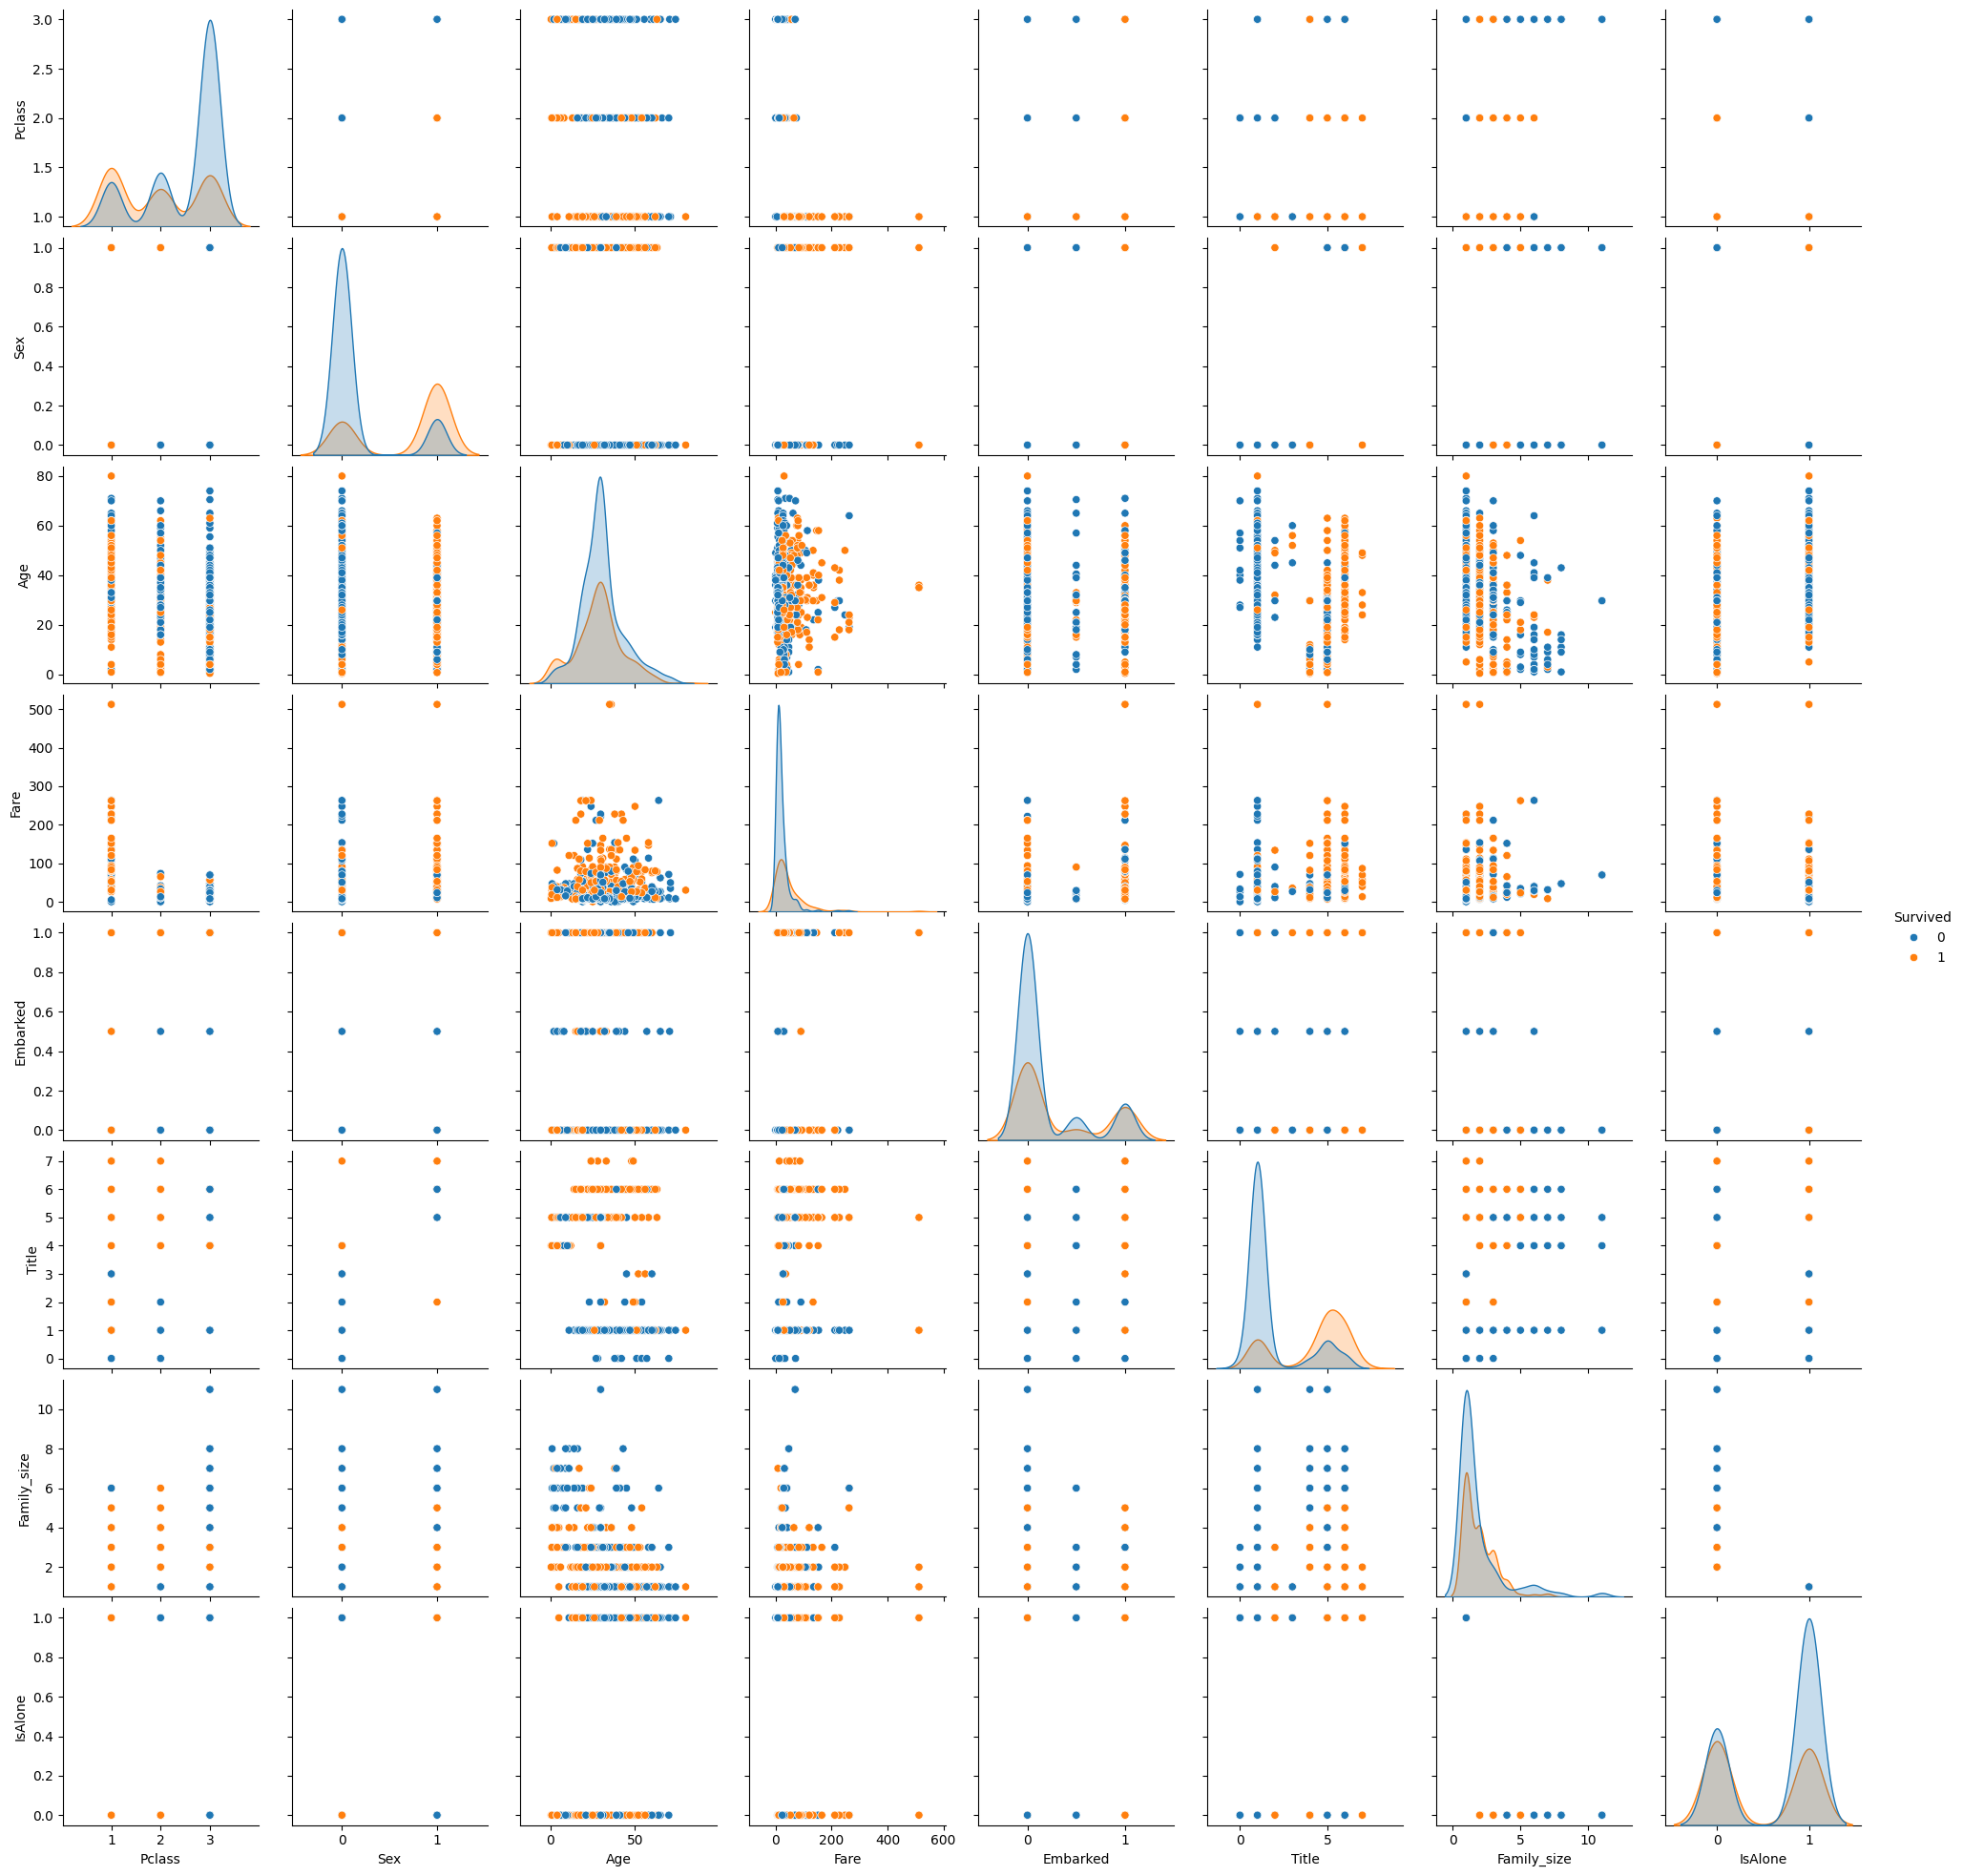

In [79]:
import seaborn as sns
sns.pairplot(df, hue='Survived')

In [80]:
df_cor=df.corr()
print(df_cor)
# target_variable='Survived'
# correlation_threshold=0.5
# print(df_cor[target_variable])
# print(df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold])
# corr_features=df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold].index.tolist()
# print(corr_features)

             Survived    Pclass       Sex       Age      Fare  Embarked  \
Survived     1.000000 -0.338481  0.543351 -0.069809  0.257307  0.167675   
Pclass      -0.338481  1.000000 -0.131900 -0.331339 -0.549500 -0.162098   
Sex          0.543351 -0.131900  1.000000 -0.084153  0.182333  0.108262   
Age         -0.069809 -0.331339 -0.084153  1.000000  0.091566  0.026749   
Fare         0.257307 -0.549500  0.182333  0.091566  1.000000  0.224719   
Embarked     0.167675 -0.162098  0.108262  0.026749  0.224719  1.000000   
Title        0.579014 -0.135780  0.937048 -0.150833  0.189523  0.108660   
Family_size  0.016639  0.065997  0.200988 -0.248512  0.217138 -0.066516   
IsAlone     -0.203367  0.135207 -0.303646  0.179775 -0.271832 -0.063532   

                Title  Family_size   IsAlone  
Survived     0.579014     0.016639 -0.203367  
Pclass      -0.135780     0.065997  0.135207  
Sex          0.937048     0.200988 -0.303646  
Age         -0.150833    -0.248512  0.179775  
Fare         0

<Axes: xlabel='Fare'>

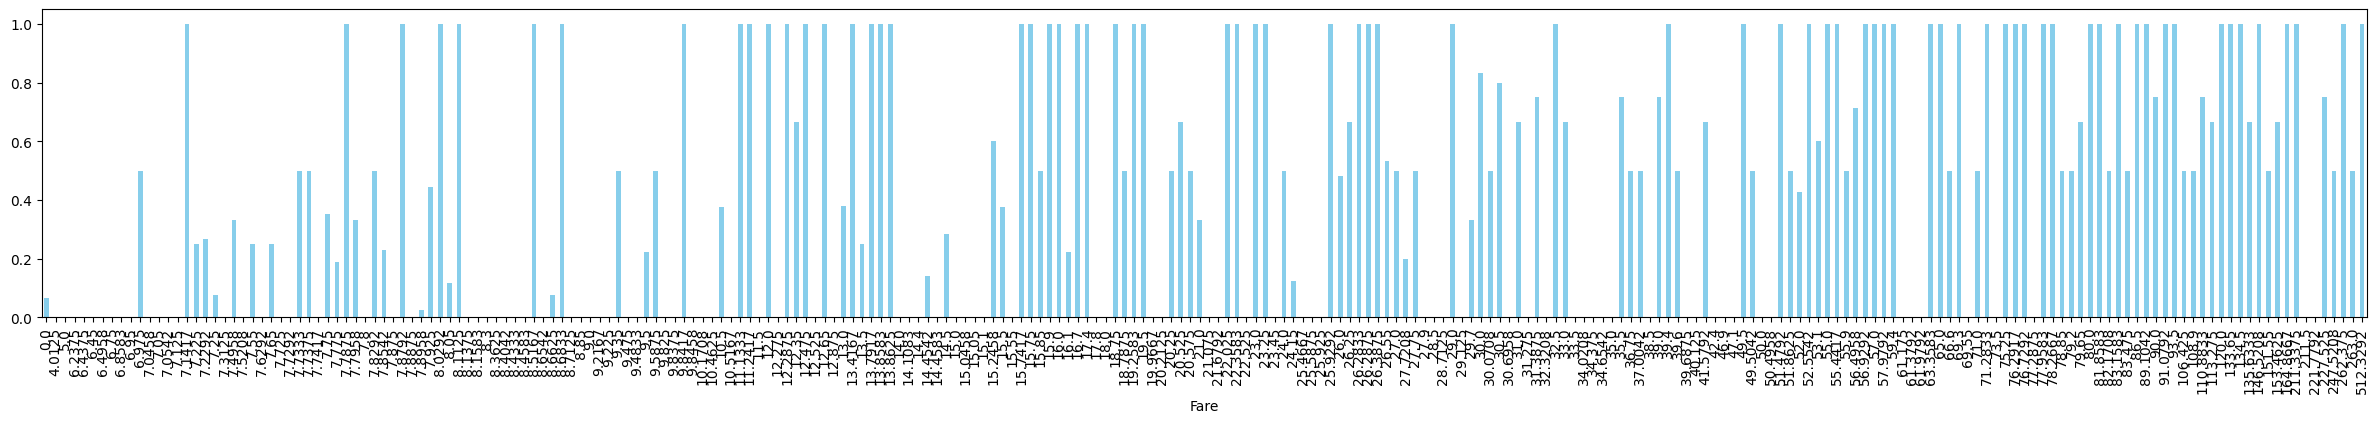

In [81]:
# Fair별 생존율 계산
Fare_survival_rate = df.groupby('Fare')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(30, 4))
Fare_survival_rate.plot(kind='bar', color='skyblue')

# Fare
- Fare와 Gender에 따른 생존율이 상이해서 승객 등급과 gender를 동시에 고려하는 파생 변수 추가

In [82]:
# gender와 pclass 조합 열 추가
# Gender와 Class의 6개 범주로
df['Gender_Class'] = df['Sex'].astype(str) + '-' + df['Pclass'].astype(str)

In [83]:
unique_Gender_Class_values = df['Gender_Class'].unique()
print(unique_Gender_Class_values)

['0-3' '1-1' '1-3' '0-1' '1-2' '0-2']


In [84]:
df.head(30)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone,Gender_Class
0,0,3,0,22.000000,7.2500,0.0,1,2,0,0-3
1,1,1,1,38.000000,71.2833,1.0,6,2,0,1-1
2,1,3,1,26.000000,7.9250,0.0,5,1,1,1-3
3,1,1,1,35.000000,53.1000,0.0,6,2,0,1-1
4,0,3,0,35.000000,8.0500,0.0,1,1,1,0-3
5,0,3,0,29.699118,8.4583,0.5,1,1,1,0-3
6,0,1,0,54.000000,51.8625,0.0,1,1,1,0-1
7,0,3,0,2.000000,21.0750,0.0,4,5,0,0-3
8,1,3,1,27.000000,11.1333,0.0,6,3,0,1-3
9,1,2,1,14.000000,30.0708,1.0,6,2,0,1-2


<Figure size 1000x1600 with 0 Axes>

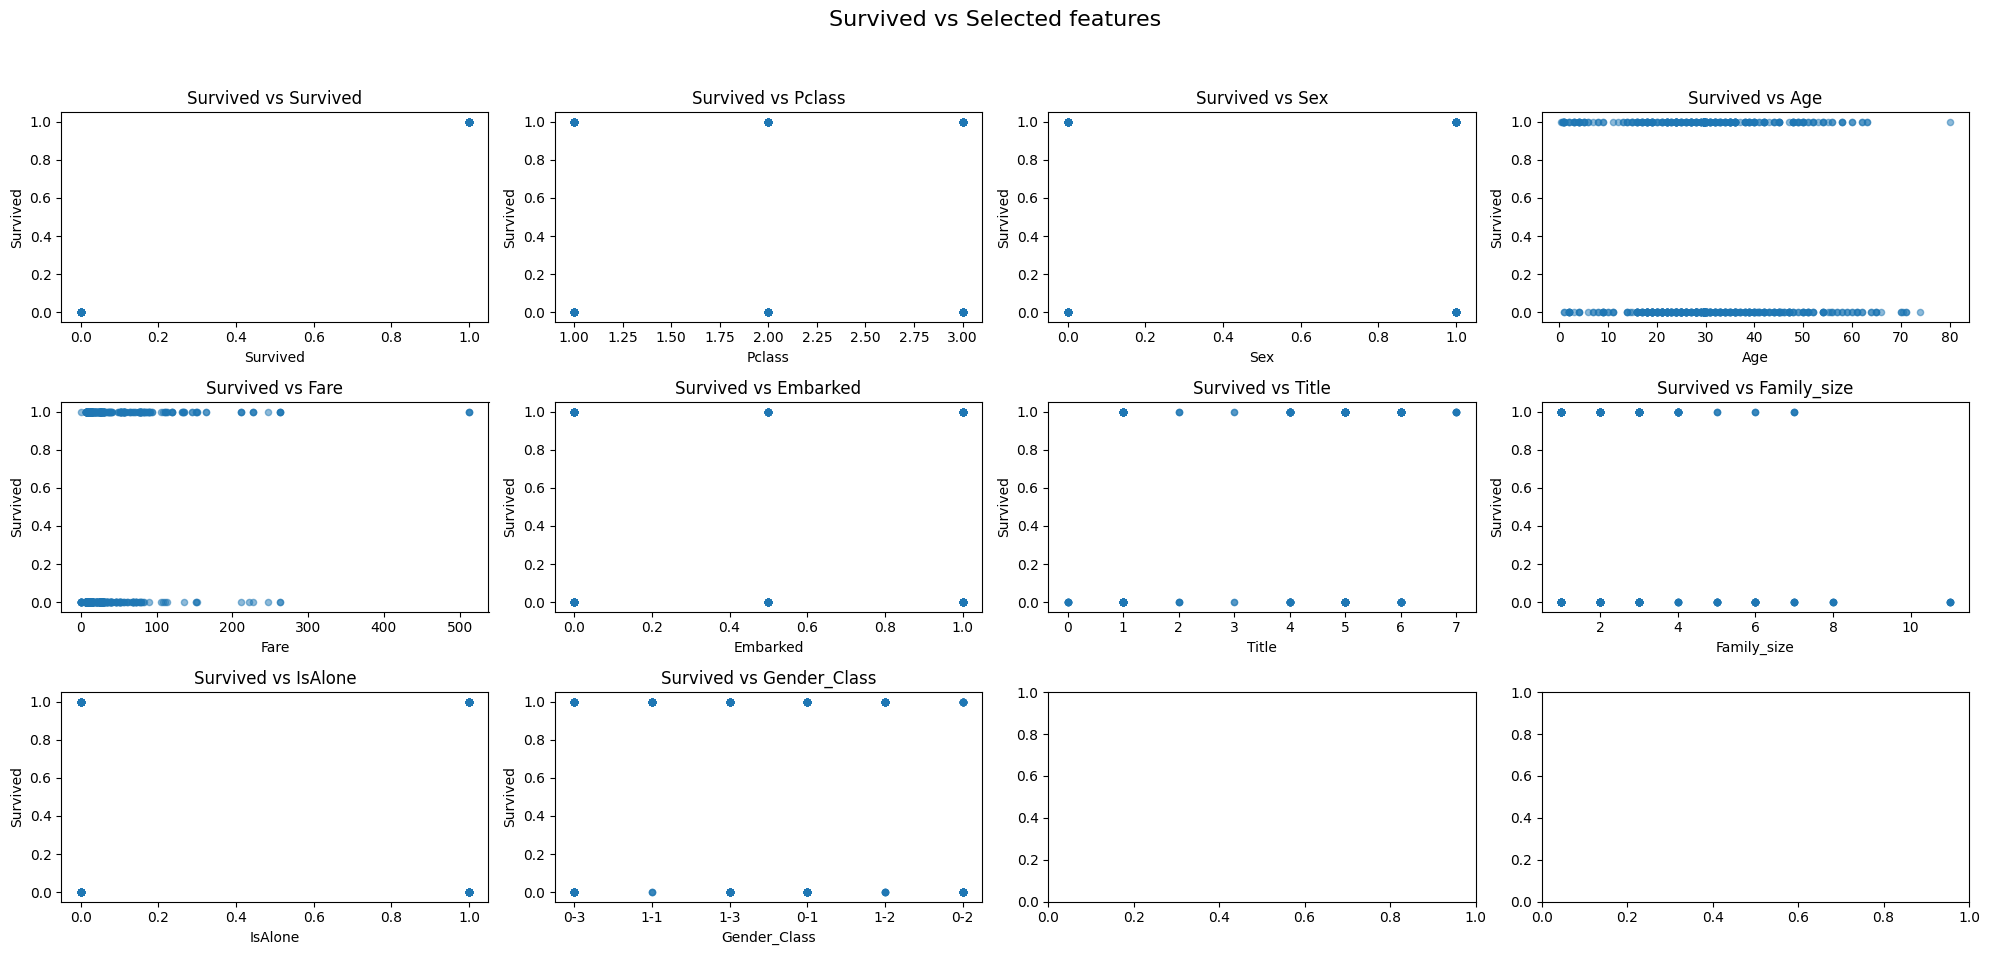

In [85]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(df.columns)
# 그래프 크기 결정
plt.figure(figsize=(10,16))
columns=df.columns
target='Survived'
nocols=4
fig, axes=plt.subplots(nrows=3, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

In [86]:
## fare를 5개 범주로
bins=[0,30,100,600]
labels=['Low', 'Medium', 'High']
df['Fare_group']=pd.cut(df['Fare'], bins=bins, labels=labels)

In [87]:
df.drop('Fare',axis=1,inplace=True)
#df.drop('Pclass',axis=1,inplace=True)
#df.drop('Sex',axis=1,inplace=True)

<Axes: xlabel='Age'>

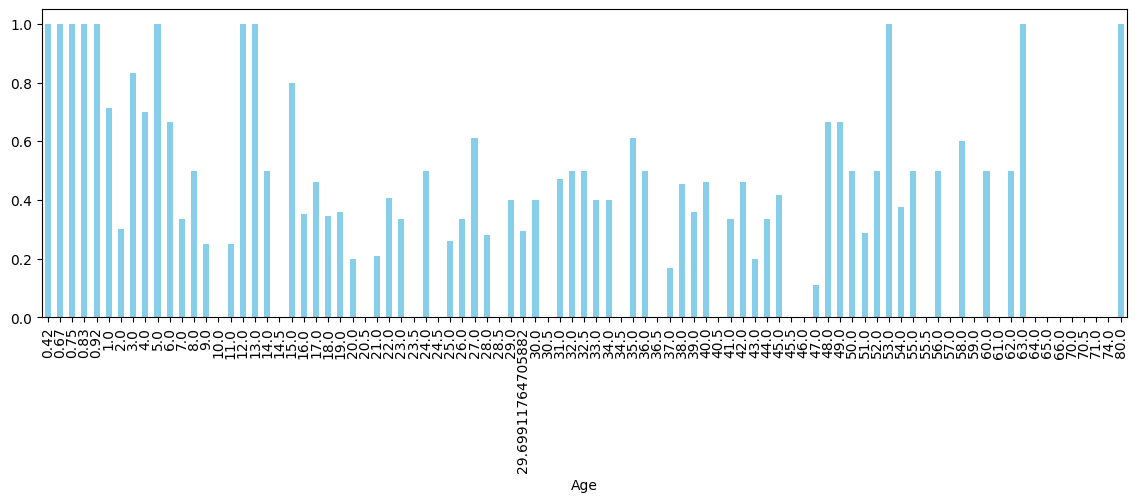

In [88]:
# Age별 생존율 계산
Age_survival_rate = df.groupby('Age')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 4))
Age_survival_rate.plot(kind='bar', color='skyblue')

In [89]:
## age를 8개의 범주로
bins=[0, 1, 5, 6, 12, 16, 48, 63,100]
labels=['Ebaby','Baby', 'Child', 'Teenager', 'Junior', 'Young Adult', 'Adult', 'Senior']
df['Age_group']=pd.cut(df['Age'], bins=bins, labels=labels)
df.drop(columns=['Age'], inplace=True)

In [90]:
# ## age를 6개의 범주로
# bins=[0,5,12,18,35,60,100]
# labels=['Infant', 'Child', 'Teenager','Young Adult', 'Adult', 'Senior']
# df['Age_group']=pd.cut(df['Age'], bins=bins, labels=labels)
# df.drop(columns=['Age'], inplace=True)

In [91]:
unique_Cabin_values = df2['Cabin'].unique()
print(unique_Cabin_values)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [92]:
df['Cabin'] = df2['Cabin'].str[:1]
df['Cabin'].fillna('N',inplace=True)

<Axes: xlabel='Cabin'>

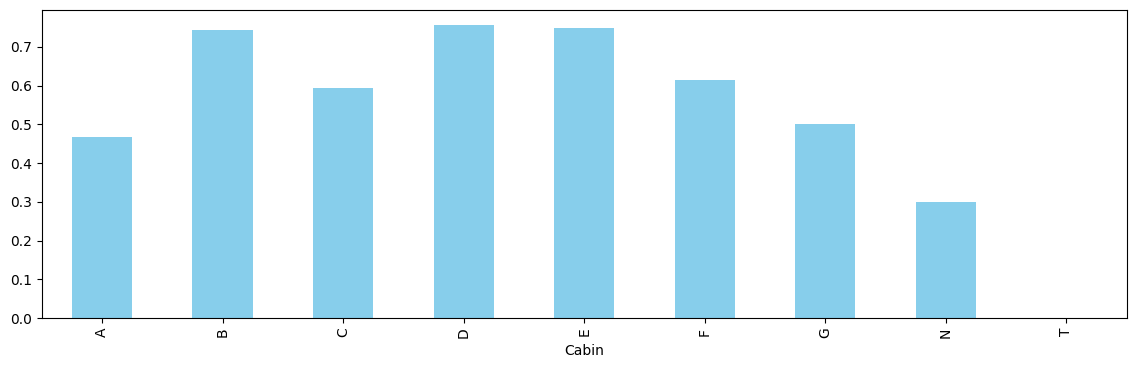

In [93]:
# Cabin별 생존율 계산
Cabin_survival_rate = df.groupby('Cabin')['Survived'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 4))
Cabin_survival_rate.plot(kind='bar', color='skyblue')

In [94]:
#df['IsCabin'] = 1
#df.loc[df['Cabin'] == "N", 'IsCabin'] = 0
#df.loc[df['Cabin'] == "T", 'IsCabin'] = 0
df.drop('Cabin',axis=1,inplace=True)

In [95]:
# 범주형 변수를 더미 변수로 변환할 열 목록
#categorical_columns=['Gender_Class', 'Fare_group', 'Age_group', 'Cabin']
categorical_columns=['Gender_Class', 'Fare_group', 'Age_group']

# 반복문을 사용하여 범주형 변수를 더미 변수로 변환
for column in categorical_columns:
  # 첫 번째 카테고리는 drop_first=True로 제거
  df=pd.get_dummies(df, columns=[column])
df.head()
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Family_size',
       'IsAlone', 'Gender_Class_0-1', 'Gender_Class_0-2', 'Gender_Class_0-3',
       'Gender_Class_1-1', 'Gender_Class_1-2', 'Gender_Class_1-3',
       'Fare_group_Low', 'Fare_group_Medium', 'Fare_group_High',
       'Age_group_Ebaby', 'Age_group_Baby', 'Age_group_Child',
       'Age_group_Teenager', 'Age_group_Junior', 'Age_group_Young Adult',
       'Age_group_Adult', 'Age_group_Senior'],
      dtype='object')

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# 타겟 변수와 피처 변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# 랜덤 포레스트 모델 학습/예측/평가
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# DecisionTreeClassifier 학습/예측/평가
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)
y_DT_pred = model_DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_DT_pred))


# LogisticRegression 학습/예측/평가
#model_LR = LogisticRegression(solver='newton-cg')
#model_LR = LogisticRegression(solver='liblinear')
model_LR = LogisticRegression(solver='saga')
model_LR.fit(X_train, y_train)
y_LR_pred = model_LR.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_LR_pred))


# Gradient Boosting Classifier 모델 학습/예측/평가
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train, y_train)
y_GB_pred = model_GB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_GB_pred))



# # 클래스 가중치 설정
# class_weights = {'Gender_Class_0-2': 1, 'Gender_Class_0-3': 1, 'Gender_Class_1-1': 1, 'Gender_Class_1-2': 2, 'Gender_Class_1-3': 2}

# # 랜덤 포레스트 모델 학습
# model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
# model.fit(X_train, y_train)


# 예측
#y_pred = model.predict(X_test)

# 성능 평가
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 23) (179, 23) (712,) (179,)
Accuracy: 0.8491620111731844
Accuracy: 0.8268156424581006
Accuracy: 0.8044692737430168
Accuracy: 0.8212290502793296


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
